In [31]:
from __future__ import division
import numpy as np
import pandas as pd
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 6.0) # set size of figures"
plt.rcParams.update({'font.size': 24})
pd.options.display.max_rows=50

Populating the interactive namespace from numpy and matplotlib


In [394]:
Events=pd.read_csv('/Users/attiladobi/Downloads/Query_all.csv',index_col='time')
#convert unix time to timestamp and set as primary index
Events['Date'] = pd.to_datetime(Events.index,unit='ms')
Events=Events.set_index('Date')
Events['day'] = pd.to_numeric(Events.index.day)
Events['month'] = pd.to_numeric(Events.index.month)
Events['year'] = pd.to_numeric(Events.index.year)

<h1> Plot most actions </h1>

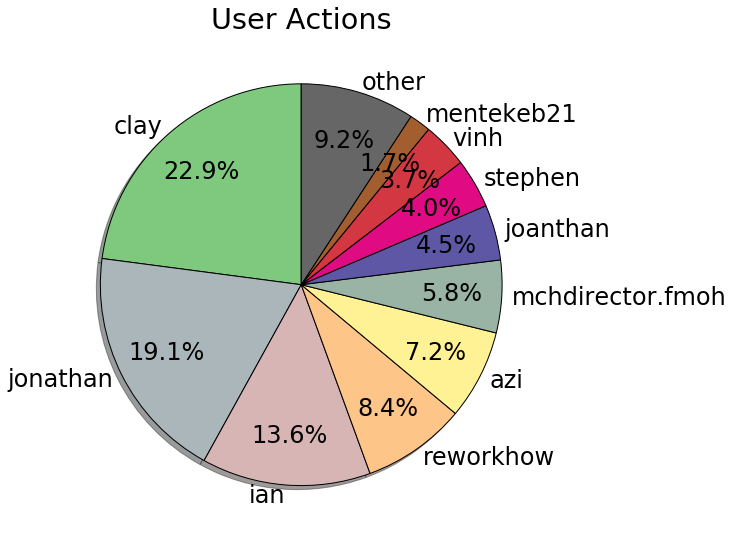

In [245]:
actions=Events.groupby(['properties.$first_name']).count().sort_values('name',ascending=False)['name']
#'distinct_id'

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
#labels=actions_cut.index
labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
#cmap = plt.cm.Wistia

colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('User Actions')

<h1> Plot user query requests </h1>

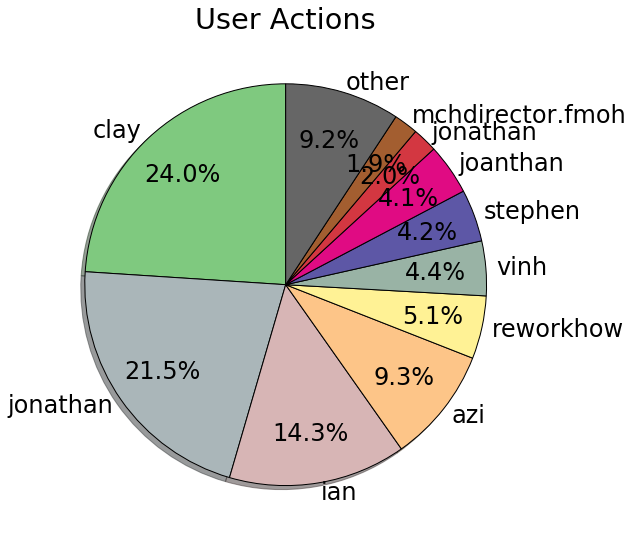

In [246]:
actions.groupby(['properties.$first_name']).count().sort_values('name',ascending=False)['name']
#'distinct_id'

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
#labels=actions_cut.index
labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
#cmap = plt.cm.Wistia

colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('User Actions')

<h1> Plot user actions for non OS users </h1>

In [186]:
actions=Events.loc[~Events['properties.$os'].str.contains('OS')]\
.groupby(['properties.$first_name']).count()
actions

,name,distinct_id,sampling_factor,properties.$browser,properties.$browser_version,properties.$city,properties.$current_url,properties.$initial_referrer,properties.$initial_referring_domain,properties.$lib_version,...,properties.hmis_indicator_4391,properties.hmis_indicator_4486,properties.hmis_indicator_3973,properties.newSelectionsFilters.hmis_indicator_3205.ranges.3.color,properties.newSelectionsFilters.hmis_indicator_3205.ranges.3.max,properties.newSelectionsFilters.hmis_indicator_3205.ranges.3.min,properties.TotalTargetPopulation,day,month,year
properties.$first_name,,,,,,,,,,,,,,,,,,,,,
achrtelot@gmail.com,128,128,128,128,128,128,128,128,128,128,...,0,0,0,0,0,0,0,128,128,128
and1brook@yahoo.com,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1
andrew.hastings@gatesfoundation.org,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,3,3,3
antenehmekuriaw@gmail.com,106,106,106,106,106,26,106,106,106,106,...,0,0,0,0,0,0,0,106,106,106
ash.shah@gatesfoundation.org,36,36,36,36,36,29,36,36,36,36,...,0,0,0,0,0,0,0,36,36,36
ayanda@nacosa.org.za,34,34,34,34,34,34,34,34,34,34,...,0,0,0,0,0,0,0,34,34,34
beletetemtim@yahoo.com,144,144,144,144,144,0,144,144,144,144,...,0,0,0,0,0,0,0,144,144,144
celeste@nacosa.org.za,52,52,52,52,52,5,52,52,52,52,...,0,0,0,0,0,0,0,52,52,52
clay@zenysis.com,75,75,75,75,75,0,75,75,75,75,...,0,0,0,0,0,0,0,75,75,75


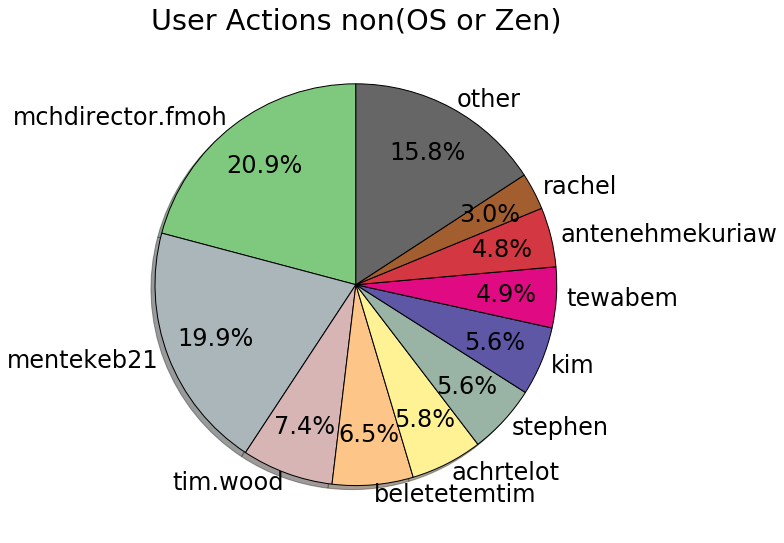

In [242]:
actions=Events.loc[~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian')\
                  & ~Events['distinct_id'].str.contains('zenysis')]\
.groupby(['properties.$first_name']).count().sort_values('name',ascending=False)['name']
#either properties.$first_name or distinct_id

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
#labels=actions_cut.index
labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
#cmap = plt.cm.Wistia

colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('User Actions non(OS or Zen)')

<h1> OS breakdown for unique users</h1>

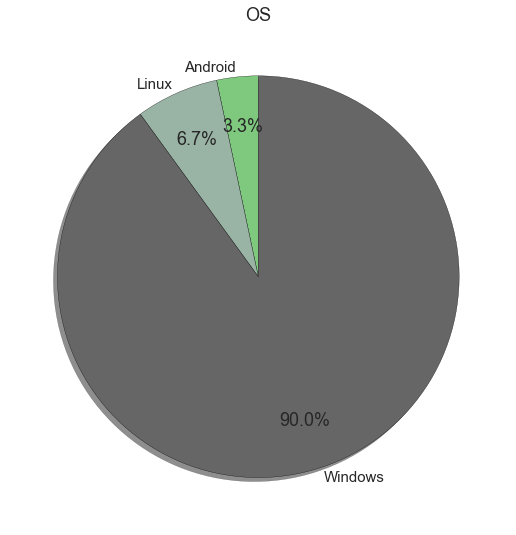

In [610]:
actions=Events.loc[~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian')& ~Events['distinct_id'].str.contains('zenysis')]\
.groupby('properties.$os')['properties.$first_name'].nunique()
#Remove OSX: Events.loc[~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian')& ~Events['distinct_id'].str.contains('zenysis')]

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
#actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
#labels=actions_cut.index
labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('OS')

<h1> browser breakdown for unique users</h1>

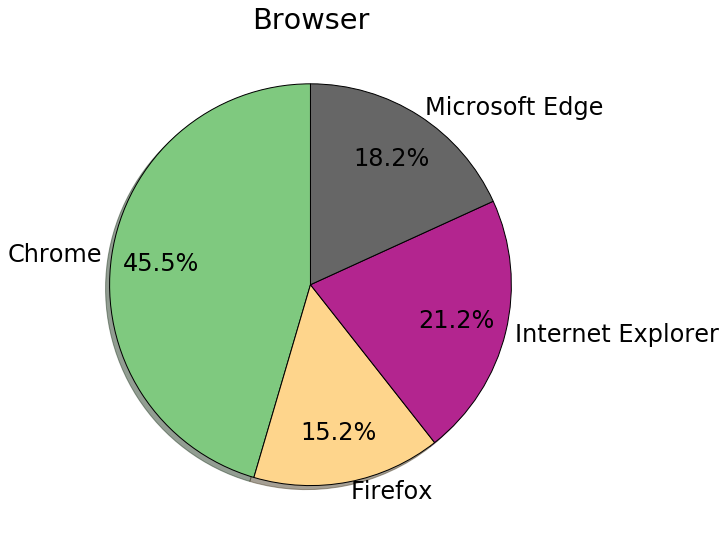

In [271]:
actions=Events.loc[~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian')\
                  & ~Events['distinct_id'].str.contains('zenysis')].groupby('properties.$browser')['properties.$first_name'].nunique()
#Remove macs: Events.loc[~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian') & ~Events['distinct_id'].str.contains('zenysis')]

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
#actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
#labels=actions_cut.index
labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('Browser')

<h1> better to group by names </h1>

In [110]:
actions=Events.groupby(['name']).count().sort_values('distinct_id',ascending=False)['distinct_id'].sort_values(ascending=False)

In [ ]:
#unique
actions=Events.groupby(['name']).distinct_id.nunique()

In [111]:
actions

name
Updated healthIndicators selection    6908
Change result view                    5500
Run query                             5230
Run query complete                    3837
Main query view                       3313
Dashboard view                        1054
Updated partners selection             838
Toggle legend series                   820
js error                               589
Updated startDate selection            500
Updated endDate selection              498
Updated targets selection              456
Login view                             444
Updated date selection                 421
Apply selections filter                375
Reset selections                       350
Updated denominator selection          345
Facilities map view                    308
Export to Excel                        300
Sidebar toggle                         194
Data status view                       136
Click save query button                100
Upload view                             97
Saved 

<h1> Total actions of all users</h1>

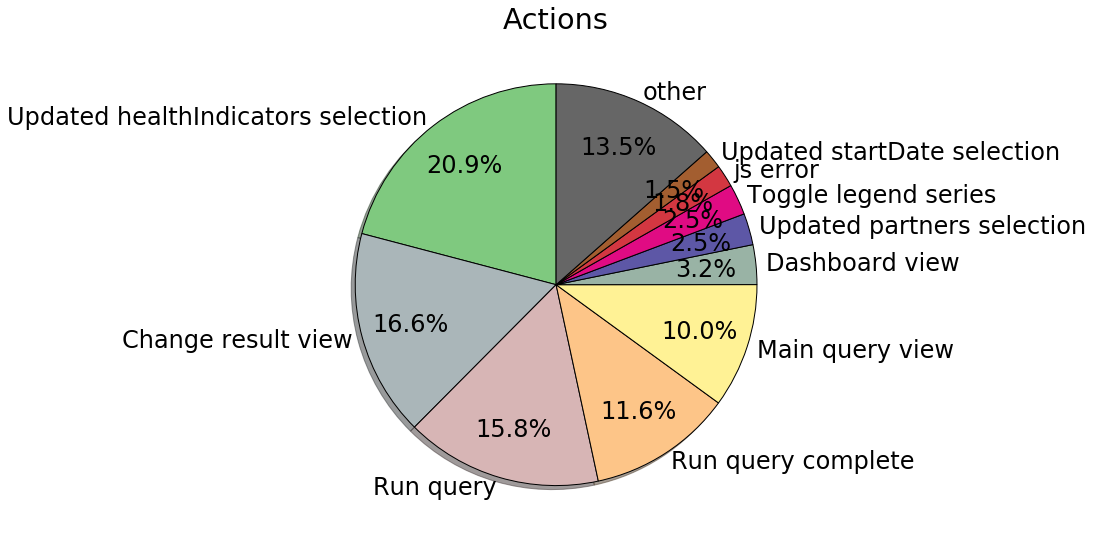

In [123]:
actions=Events.groupby(['name']).count().sort_values('distinct_id',ascending=False)['distinct_id'].sort_values(ascending=False)
#actions=Events.groupby(['name']).distinct_id.nunique().sort_values(ascending=False)

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
labels=actions_cut.index
#labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('Actions')

<h1> Total actions of all users not using OS</h1>

In [134]:
Events.loc[~Events['properties.$os'].str.contains('OS')]

,name,distinct_id,sampling_factor,properties.$browser,properties.$browser_version,properties.$city,properties.$current_url,properties.$initial_referrer,properties.$initial_referring_domain,properties.$lib_version,...,properties.hmis_indicator_4391,properties.hmis_indicator_4486,properties.hmis_indicator_3973,properties.newSelectionsFilters.hmis_indicator_3205.ranges.3.color,properties.newSelectionsFilters.hmis_indicator_3205.ranges.3.max,properties.newSelectionsFilters.hmis_indicator_3205.ranges.3.min,properties.TotalTargetPopulation,day,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-08 09:21:28,Main query view,massoud,1,Firefox,45.0,Addis Ababa,http://preview.zenysis.com/,$direct,$direct,2.7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2,2016
2016-10-27 11:09:53,Main query view,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/query,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016
2016-10-27 11:10:04,Dashboard view,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/dashboard,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016
2016-10-27 11:10:12,Main query view,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/query,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016
2016-10-27 11:18:57,Updated healthIndicators selection,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/query,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016
2016-10-27 11:19:08,Run query,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/query,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016
2016-10-27 11:19:42,Run query,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/query,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016
2016-10-27 11:20:01,Updated healthIndicators selection,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/query,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016
2016-10-27 11:20:02,Updated denominator selection,m_berdnikov@hotmail.com,1,Internet Explorer,11.0,Centurion,http://nacosa.zenysis.com/query,$direct,$direct,2.9.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,10,2016


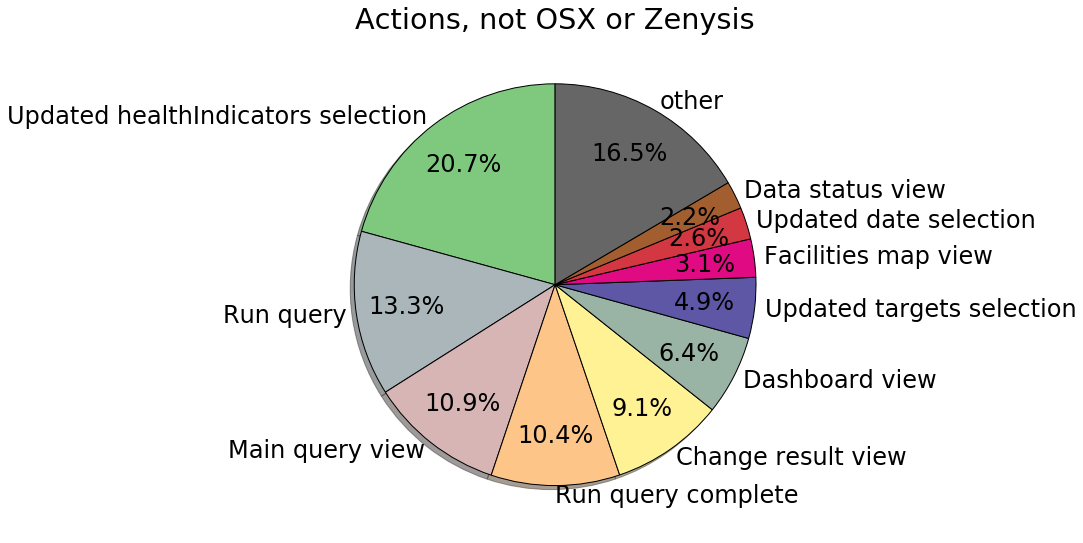

In [244]:
actions=Events.loc[~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian')\
                  & ~Events['distinct_id'].str.contains('zenysis')]\
            .groupby(['name']).count()\
.sort_values('distinct_id',ascending=False)['distinct_id'].sort_values(ascending=False)
#actions=Events.groupby(['name']).distinct_id.nunique().sort_values(ascending=False)

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
labels=actions_cut.index
#labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('Actions, not OSX or Zenysis')

<h1> Number of unique users who have taken a particular action </h1>

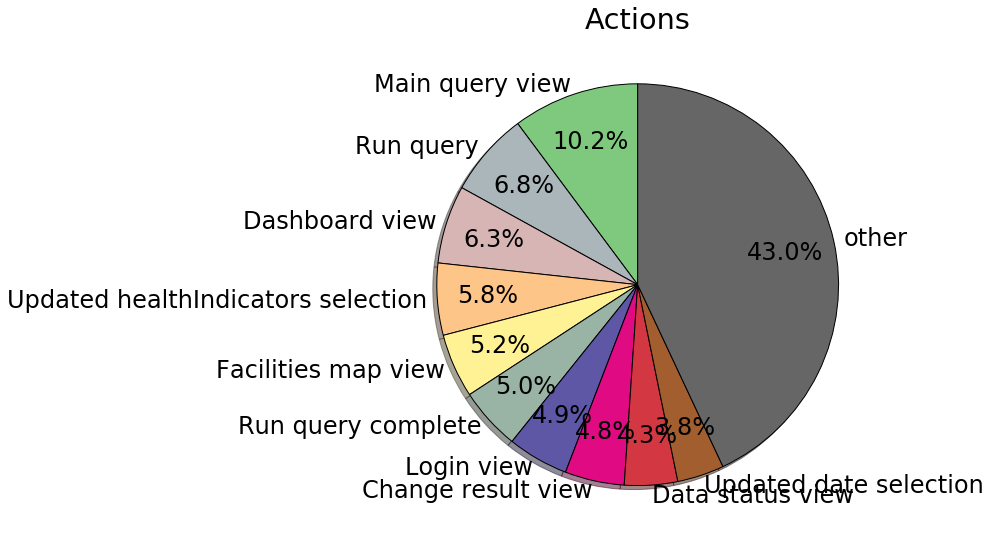

In [122]:
#actions=Events.groupby(['name']).count().sort_values('distinct_id',ascending=False)['distinct_id']
actions=Events.groupby(['name']).distinct_id.nunique().sort_values(ascending=False)

actions_cut=actions[0:10]
s_other = pd.Series([actions[10:].sum()], index=['other'])
actions_cut=actions_cut.append(s_other)

pylab.rcParams['figure.figsize'] = (9.0, 9.0) # set size of figures"
# The slices will be ordered and plotted counter-clockwise.
labels=actions_cut.index
#labels = [label.split('@')[0] for label in actions_cut.index]
sizes = actions_cut.values
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#explode = (0.01, 0.01, 0, 0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')

cmap = plt.cm.Accent
colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts= plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=0.75, labeldistance=1.05, shadow=True, startangle=90)
plt.title('Actions')

<h1> Complete Query to Run Query (no OS) </h1>

In [281]:
zen_cut=(~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian')\
                  & ~Events['distinct_id'].str.contains('zenysis'))

In [282]:
actions=Events.loc[~Events['properties.$os'].str.contains('OS') & Events['name'].str.contains('Run query')\
                  & zen_cut][['name','month','distinct_id']].groupby(['name','month']).count()

#also remove ian and zenysis accounts

In [297]:
actions

,name,month,distinct_id
Date,,,
2016-10-27 11:19:08,Run query,10,m_berdnikov@hotmail.com
2016-10-27 11:19:42,Run query,10,m_berdnikov@hotmail.com
2016-10-27 11:20:21,Run query,10,m_berdnikov@hotmail.com
2016-10-27 11:20:30,Run query,10,m_berdnikov@hotmail.com
2016-03-14 18:06:46,Run query,3,bmgf_demo
2016-03-14 18:06:48,Run query complete,3,bmgf_demo
2016-03-14 18:07:08,Run query,3,bmgf_demo
2016-03-14 18:07:10,Run query complete,3,bmgf_demo
2016-03-14 18:07:22,Run query,3,bmgf_demo


In [283]:
rq=actions['distinct_id']['Run query']
rqc=actions['distinct_id']['Run query complete']

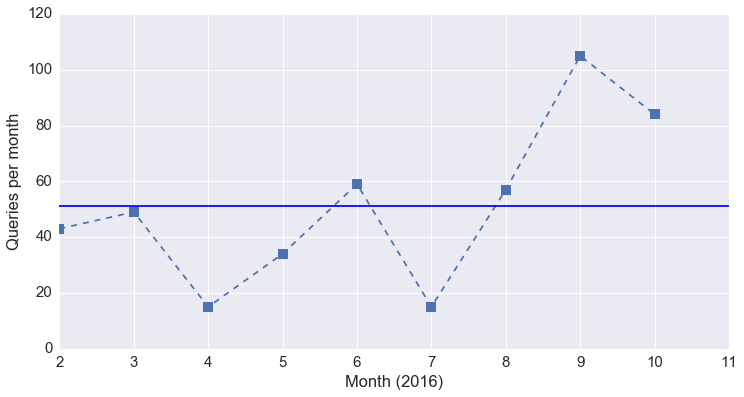

In [611]:
pylab.rcParams['figure.figsize'] = (12.0, 6.0) # set size of figures"
plt.plot(rq[:-1],'s--',markersize=10)
plt.plot(rq.index,ones(len(rq))*rq[:-1].mean(),'-b')
plt.ylabel('Queries per month')
xlabel('Month (2016)')

(2, 11)

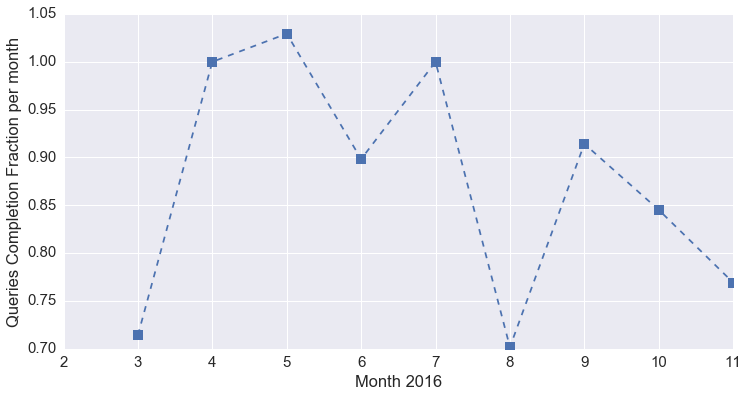

In [613]:
pylab.rcParams['figure.figsize'] = (12.0, 6.0) # set size of figures"
plt.plot(rqc/rq,'s--',markersize=10)
#plt.plot(rq.index,ones(len(rq))*rq.mean())
ylabel('Queries Completion Fraction per month')
xlabel('Month 2016')
xlim(2,11)

In [173]:
rqc

month
3      35
4      15
5      38
6      55
7      64
8      86
9     183
10    127
11     52
Name: distinct_id, dtype: int64

In [175]:
rq

month
2      43
3      59
4      15
5      37
6      61
7      65
8     106
9     195
10    145
11     59
Name: distinct_id, dtype: int64

<h1> Excel exports </h1>

In [180]:
actions=Events.loc[~Events['properties.$os'].str.contains('OS') & Events['name'].str.contains('Excel')]\
[['name','month','distinct_id']].groupby(['name','month']).count()
actions

distinct_id
name            month             
Export to Excel 3                1
                4                1
                5                5
                6                2
                7                2
                8               13
                9               25
                10              13

<h1> Cohort analysis </h1>

<h3> determine the users first interaction with the site and assigne them to the cohort </h1>

In [396]:
right = pd.DataFrame(Events.groupby('distinct_id')['month'].min()).rename(columns={'month':'cohort'})
#also with distinct_id

In [397]:
Events = Events.join(right, on='distinct_id')

In [398]:
grouped = Events.loc[zen_cut].groupby(['cohort','month'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'distinct_id': pd.Series.nunique,
                       'name': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'distinct_id': 'TotalUsers',
                        'name': 'Total unique actions'}, inplace=True)
cohorts.head()


TotalUsers  Total unique actions
cohort month                                  
2      2              14                     9
       3               4                    17
       4               1                     3
       5               2                    10
       7               1                     1

In [399]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  Total unique actions  CohortPeriod
cohort month                                                
2      2              14                     9             1
       3               4                    17             2
       4               1                     3             3
       5               2                    10             4
       7               1                     1             5

In [400]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

cohort
2    14
3     2
4     2
5     1
6     1
Name: TotalUsers, dtype: int64

In [401]:
cohorts['TotalUsers'].head()

cohort  CohortPeriod
2       1               14
        2                4
        3                1
        4                2
        5                1
Name: TotalUsers, dtype: int64

In [402]:
cohorts['TotalUsers'].unstack(0).head()

cohort,2,3,4,5,6,8,9,10,11
CohortPeriod,,,,,,,,,
1,14.0,2.0,2.0,1.0,1.0,4.0,7.0,7.0,6.0
2,4.0,1.0,2.0,NaN,NaN,3.0,2.0,1.0,NaN
3,1.0,1.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN
4,2.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN
5,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
#divide by the number of users 
count_user_retention=cohorts['TotalUsers'].unstack(0)

user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

cohort,2,3,4,5,6,8,9,10,11
CohortPeriod,,,,,,,,,
1,1.000000,1.0,1.0,1.0,1.0,1.00,1.000000,1.000000,1.0
2,0.285714,0.5,1.0,NaN,NaN,0.75,0.285714,0.142857,NaN
3,0.071429,0.5,1.0,NaN,NaN,0.50,NaN,NaN,NaN
4,0.142857,0.5,1.0,NaN,NaN,0.25,NaN,NaN,NaN
5,0.071429,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN


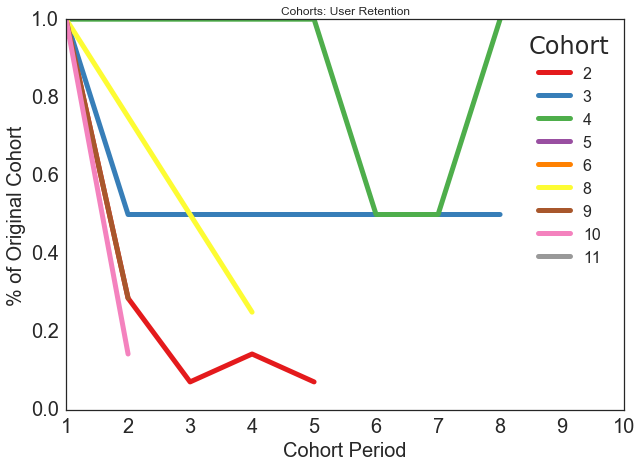

In [430]:
#pylab.rcParams['figure.figsize'] = (16.0, 12.0)

user_retention.plot(figsize=(10,7),linewidth=5,fontsize=20,cmap='Set1')
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 10)
plt.ylabel('% of Original Cohort',fontsize=20)
plt.xlabel('Cohort Period',fontsize=20)
plt.legend(title='Cohort',fontsize=16)

<h1> plot in terms of actual numbers </h1>

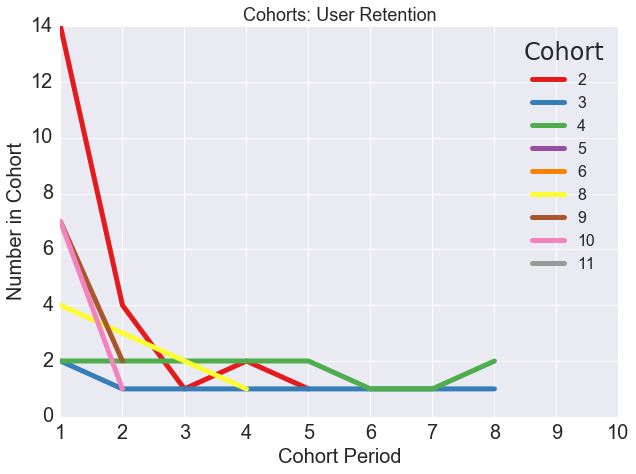

In [614]:
pylab.rcParams['figure.figsize'] = (16.0, 12.0)
plt.rcParams.update({'font.size': 24})

count_user_retention.plot(figsize=(10,7),linewidth=5,fontsize=20,cmap='Set1')
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 10)
plt.ylabel('Number in Cohort',fontsize=20)
plt.xlabel('Cohort Period',fontsize=20)
plt.legend(title='Cohort',fontsize=16)

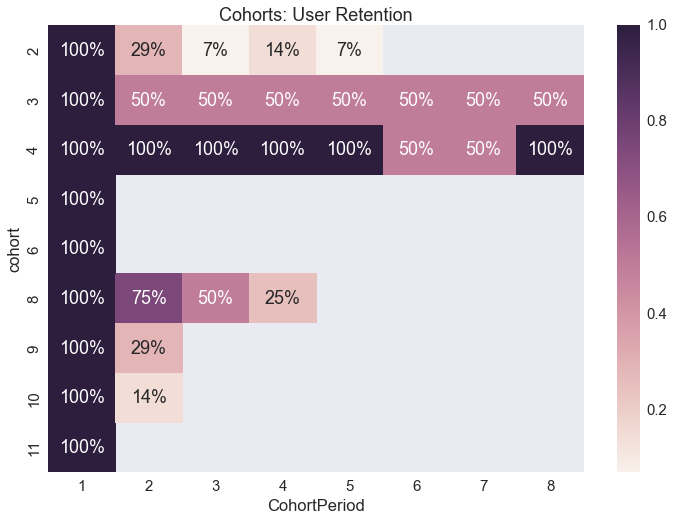

In [447]:
import seaborn as sns
sns.set(style='white')
sns.set(font_scale=1.5)

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');


In [405]:
user_retention.T

CohortPeriod,1,2,3,4,5,6,7,8
cohort,,,,,,,,
2,1.0,0.285714,0.071429,0.142857,0.071429,NaN,NaN,NaN
3,1.0,0.500000,0.500000,0.500000,0.500000,0.5,0.5,0.5
4,1.0,1.000000,1.000000,1.000000,1.000000,0.5,0.5,1.0
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,0.750000,0.500000,0.250000,NaN,NaN,NaN,NaN
9,1.0,0.285714,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,0.142857,NaN,NaN,NaN,NaN,NaN,NaN
11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [438]:
plt.figure?

In [395]:
zen_cut=(~Events['properties.$os'].str.contains('OS') & ~Events['distinct_id'].str.contains('ian')\
                  & ~Events['distinct_id'].str.contains('zenysis'))

Events.loc[zen_cut].groupby('month')['properties.id'].count()

month
2       0
3       0
4       0
5       0
6      63
7      87
8     535
9     731
10    647
11    151
Name: properties.id, dtype: int64